<a target="_blank" href="https://colab.research.google.com/github/fbenitachen/eda-visualization/blob/main/amazon_top50bestsellingbooks_eda_visualization.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## EDA with Visualization - Amazon Top 50 Bestselling Books 📚

EDA with Visualization & Hypothesis Test using Amazon Top 50 Bestselling Books datasets.

#### <span style="font-size:17px; text-decoration: underline;">Created by: Felice Benita</span>

#### Importing Datasets
------

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import fuzzywuzzy
from fuzzywuzzy import process
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [3]:
# Reading data
df = pd.read_csv('File Dirr/bestsellers with categories.csv') # Loading data
df.head() # Displaying the first 5 lines of the dataset

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#### Data Description
------

In [4]:
# The dimension of the data
print(f'Data contain {df.shape[0]} records and {df.shape[1]} columns.')

Data contain 550 records and 7 columns.


In [5]:
# Concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
# Data type of each columns
print(df.dtypes)

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object


#### Data Wrangling
------

In [7]:
# Check missing values
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

##### The data has no missing values, so no further transformations are required.

In [8]:
# Check duplicate values
df.duplicated().sum()

np.int64(0)

##### The data has no duplicate values, so no further transformations are required.

In [9]:
# Forming categorical columns
cat_col = list(df.select_dtypes(exclude=('int', 'float')).columns)
print(f'Categorical columns : {", ".join(cat_col)}.')

Categorical columns : Name, Author, Genre.


In [10]:
# Check for spelling errors in entire dataset
for col in cat_col:
    print(f'Actual {col}: "{len(set(df[col]))}" - After Spell Check {col}: "{len(set(df[col].str.title().str.strip()))}"')

Actual Name: "351" - After Spell Check Name: "350"
Actual Author: "248" - After Spell Check Author: "248"
Actual Genre: "2" - After Spell Check Genre: "2"


In [11]:
# Correct the errors
df.Name = df.Name.str.title().str.strip()

In [12]:
# Check if the changes have passed
for col in cat_col:
    print(f'Actual {col}: "{len(set(df[col]))}" - After Spell Check {col}: "{len(set(df[col].str.title().str.strip()))}"')

Actual Name: "350" - After Spell Check Name: "350"
Actual Author: "248" - After Spell Check Author: "248"
Actual Genre: "2" - After Spell Check Genre: "2"


In [13]:
# Check for spelling errors in Author column
authors = df.Author.sort_values().unique()
authors

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

##### Observe that names with initial have a tendency to be in different varaiations. George R. R. Martin and J. K. Rowling fall into this category.

In [14]:
# Let's build a list of the most similar spellings for the first Author with this error
matches_author_name = fuzzywuzzy.process.extract('George R.R. Martin', authors, limit=4, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches_author_name

[('George R. R. Martin', 100),
 ('George R.R. Martin', 100),
 ('George Orwell', 53),
 ('Bill Martin Jr.', 52)]

In [15]:
# Let's build a list of the most similar spellings for the second Author with this error
matches_author_name = fuzzywuzzy.process.extract('J. K. Rowling', authors, limit=4, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches_author_name

[('J. K. Rowling', 100),
 ('J.K. Rowling', 100),
 ('Mark Owen', 50),
 ('Mark Twain', 48)]

In [16]:
# Replace the names of the Authors with the correct ones
df = df.replace('George R. R. Martin', 'George R.R. Martin')
df = df.replace('J. K. Rowling', 'J.K. Rowling')

In [17]:
# Check if the changes have passed
for col in cat_col:
    print(f'Before {col}: {len(set(df[col]))} After {col}: {len(set(df[col].str.title().str.strip()))}')

Before Name: 350 After Name: 350
Before Author: 246 After Author: 246
Before Genre: 2 After Genre: 2


In [18]:
# Check the column Genre
genre = df.Genre.unique()
genre

array(['Non Fiction', 'Fiction'], dtype=object)

##### Everything is fine with genres.

In [19]:
# Check the column Year
years = list(df.Year.unique())
sorted(years)

[np.int64(2009),
 np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019)]

##### Everything is fine with years.

#### Exploratory Data Analysis (EDA)
------

<span style="color:#1b259f; font-size:17px; font-weight:bold">1. Genre Distribution</span>

Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

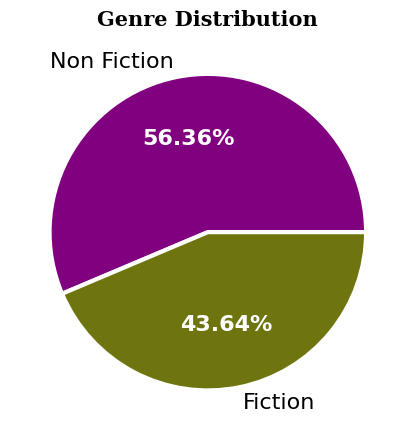

In [20]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))

colors = ['#800080','#6e750e']
# Capture each of the return elements.
patches, texts, pcts = ax.pie(
    df['Genre'].value_counts(), labels = df['Genre'].value_counts().index, autopct='%1.2f%%', colors=colors,
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 16})
# Style just the percent values.
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Genre Distribution', fontfamily='serif', fontsize=15, fontweight='bold')
plt.tight_layout()
df['Genre'].value_counts()

<span style="font-size:16px;">✔️ INSIGHT: By analyzing the genre distribution, Non-fiction is more likely to become a bestseller. Later we will find out how users relate to these genres</span>

<span style="color:#1b259f; font-size:17px; font-weight:bold">2. Trends & Outliers</span>

<span style="font-size:15px;">Let's look at the measures of the central trend that characterize the distribution of numerical values in the data. We render a box-plot for each numeric variable.</span>

In [21]:
# Display summary statistical
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


<span style="font-size:16px; font-weight:bold;">☑️ User Rating, Reviews, and Price - Trends & Outliers</span>

array([[<Axes: title={'center': 'User Rating'}>,
        <Axes: title={'center': 'Reviews'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

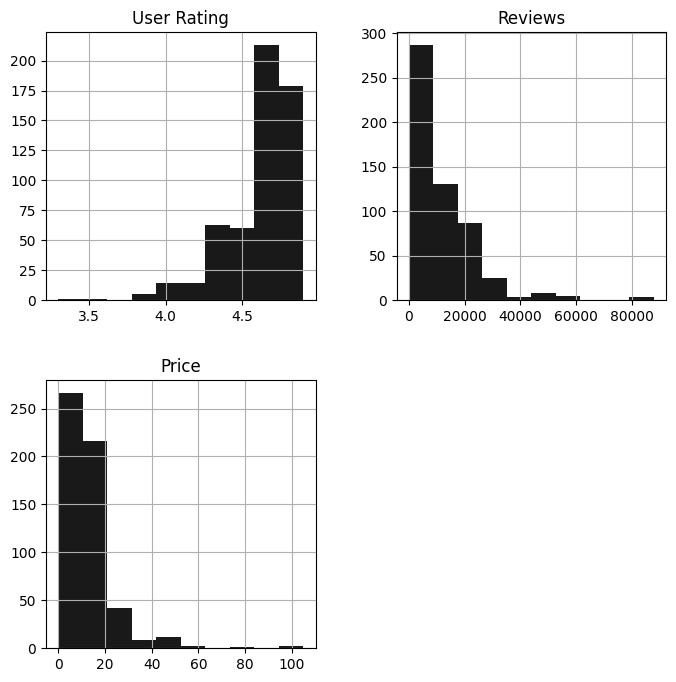

In [22]:
# Distribution of numerical variables
subset_df = list(df[['User Rating', 'Reviews', 'Price']])
df[subset_df].hist(figsize=(8, 8), color='k', alpha=0.9)

<Axes: xlabel='Price'>

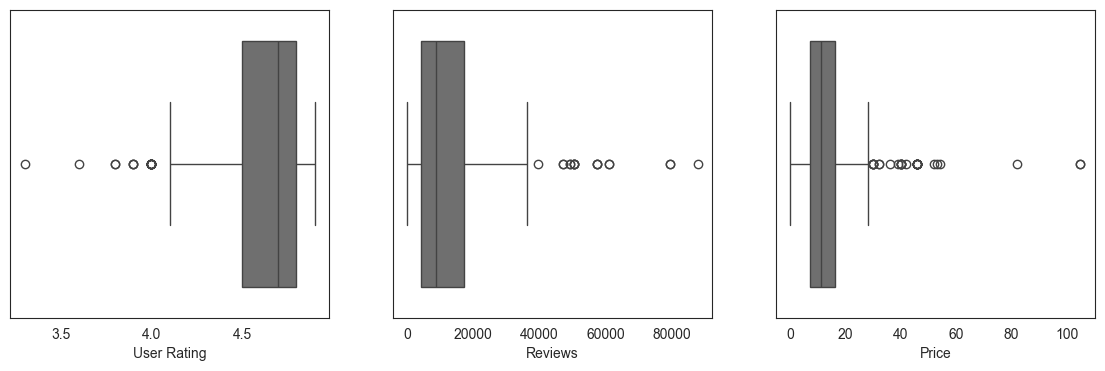

In [23]:
sns.set_style('white')

fig, axs = plt.subplots(1, 3, figsize=(14, 4))
sns.boxplot(data=df, x='User Rating', color='#6F6F6F', ax=axs[0])
sns.boxplot(data=df, x='Reviews', color='#6F6F6F', ax=axs[1])
sns.boxplot(data=df, x='Price', color='#6F6F6F', ax=axs[2])

<span style="font-size:14px;">
✔️ INSIGHT:<br/>
By analyzing the numeric data, it is established:<br/><br/>

<p style="font-weight:bold;">User Rating:</p>

1. Data is not distributed normally. Asymmetry is observed.
2. Average and median book ratings are 4.7.
3. There are outliers in the data. There are a small number of books in the data below the 4.1 rating.


<p style="font-weight:bold;">Reviews:</p>

1. Data is not distributed normally. Asymmetry is observed.
2. The data has a wide range.
3. There are outliers in the data. There are a small number of books receiving reviews well above the 75 percentile.


<p style="font-weight:bold;">Price:</p>

1. Data is not distributed normally. Asymmetry is observed.
2. There are books that cost much higher than the average, as well as books with a cost of 0, which is strange.There are books that cost much higher than the average, as well as books with a cost of 0, which is strange. Either the book is given for free or this error.
</span>

<span style="color:#1b259f; font-size:17px; font-weight:bold">3. Correlation In The Data</span>

#### Let's look at the correlation in the data.

Pairwise correlation of all columns in the dataframe




<Axes: >

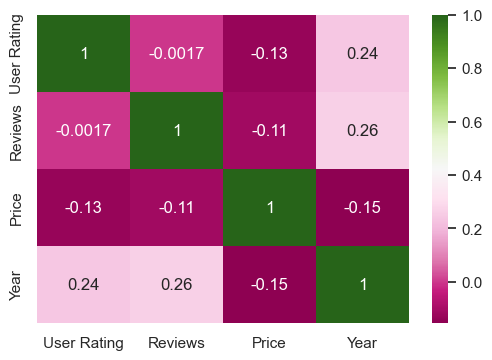

In [24]:
# Correlation in the data
df_corr = df.copy()
df_corr = df_corr.drop(['Name', 'Author', 'Genre'], axis=1)
print('\033[1m'+"Pairwise correlation of all columns in the dataframe")
print()
df_corr.corr()
print()
sns.set(rc = {'figure.figsize': (6, 4)})
sns.heatmap(df_corr.corr(), annot=True, cmap="PiYG")

<span style="color:#1b259f; font-size:16px; font-weight:bold; padding-left:5px">3.1 Reviews vs. User Rating</span>

Text(0.5, 1.0, 'Reviews vs. User Rating')

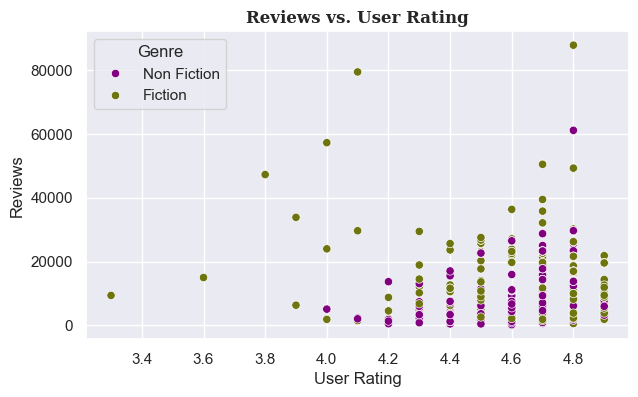

In [25]:
# Correlation between reviews and user rating
color_dict = dict({'Non Fiction':'#800080', 'Fiction':'#6e750e'})
sns.set(rc = {'figure.figsize': (7, 4)})
ax = sns.scatterplot(data=df, x="User Rating", y="Reviews", hue="Genre", palette=color_dict)
ax.set_title("Reviews vs. User Rating", fontfamily='serif', fontsize=12, fontweight='bold')

<span style="color:#1b259f; font-size:16px; font-weight:bold; padding-left:5px">3.2 Price vs. User Rating</span>

Text(0.5, 1.0, 'Price vs. User Rating')

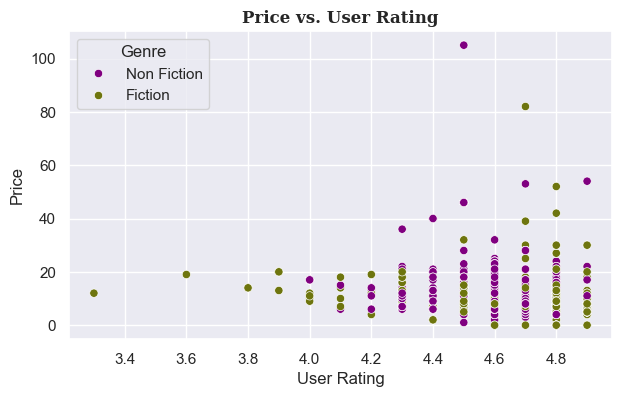

In [26]:
# Correlation between price and user rating
color_dict = dict({'Non Fiction':'#800080', 'Fiction':'#6e750e'})
sns.set(rc = {'figure.figsize': (7, 4)})
ax = sns.scatterplot(data=df, x="User Rating", y="Price", hue="Genre", palette=color_dict)
ax.set_title("Price vs. User Rating", fontfamily='serif', fontsize=12, fontweight='bold')

<span style="color:#1b259f; font-size:16px; font-weight:bold; padding-left:5px">3.3 Reviews vs. Price</span>

Text(0.5, 1.0, 'Reviews vs. Price')

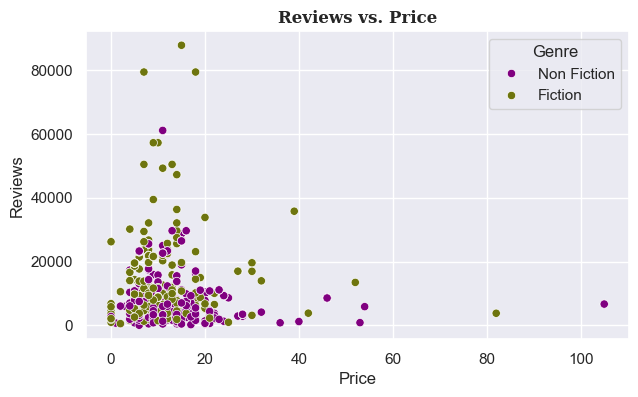

In [27]:
# Correlation between reviews and price
color_dict = dict({'Non Fiction':'#800080', 'Fiction':'#6e750e'})
sns.set(rc = {'figure.figsize': (7, 4)})
ax = sns.scatterplot(data=df, x="Price", y="Reviews", hue="Genre", palette=color_dict)
ax.set_title("Reviews vs. Price", fontfamily='serif', fontsize=12, fontweight='bold')

<span style="font-size:15px;">✔️ INSIGHT: Based on the constructed correlation matrix as well as the constructed visualizations, it can be seen that the data does not contain any positive or negative linear relationship between the rating, reviews and the price of books.</span>

<span style="color:#1b259f; font-size:17px; font-weight:bold">4. The Most Popular Authors & Most Popular Books</span>

<span style="color:#1b259f; font-size:16px; font-weight:bold; padding-left:5px">4.1 The Most Popular Author</span>

In [28]:
# The most popular authors
authors = df.groupby('Author').agg({'User Rating':'mean', 'Reviews':'sum', 'Name': 'count'}).rename({'Name': 'Total Books'}, axis = 1)
authors.sort_values(['User Rating', 'Reviews'], ascending = (False, False)).head(10)

,User Rating,Reviews,Total Books
Author,,,
Eric Carle,4.9,136822,7
Sarah Young,4.9,117456,6
Dav Pilkey,4.9,51496,7
Emily Winfield Martin,4.9,35368,4
Bill Martin Jr.,4.9,28688,2
Sherri Duskey Rinker,4.9,14076,2
Jill Twiss,4.9,11881,1
Rush Limbaugh,4.9,10986,2
Nathan W. Pyle,4.9,9382,1


[Text(0, 0.5, '')]

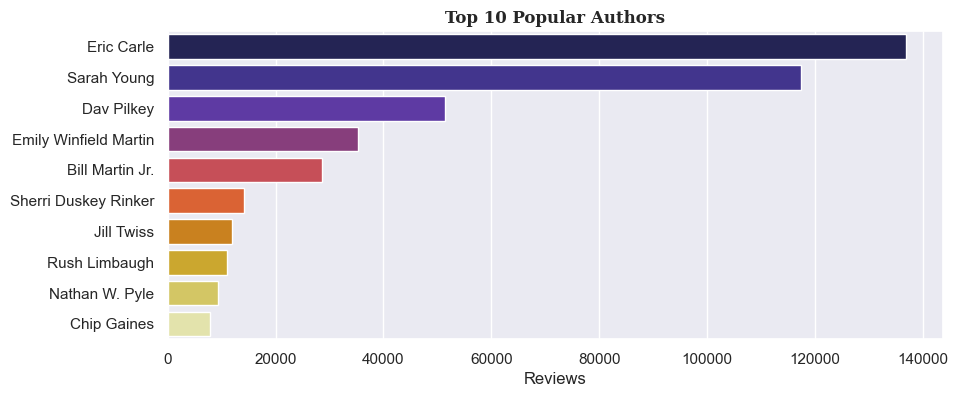

In [29]:
# Visualize most popular authors
authors = df.groupby('Author').agg({'User Rating':'mean', 'Reviews':'sum', 'Name': 'count'}).rename({'Name': 'Total Books'}, axis = 1)
authors = authors.sort_values(['User Rating', 'Reviews'], ascending = (False, False)).head(10).reset_index()

sns.set(rc = {'figure.figsize': (10, 4)})
ax = sns.barplot(data=authors, x="Reviews", y="Author", palette="CMRmap")
ax.set_title("Top 10 Popular Authors", fontfamily='serif', fontsize=12, fontweight='bold')
ax.set(ylabel=None)

<span style="color:#1b259f; font-size:16px; font-weight:bold; padding-left:5px">4.2 The Most Popular Books</span>

In [30]:
# The most popular books
books = df.groupby('Name').agg({'User Rating':'mean', 'Reviews':'sum', 'Name': 'count'}).rename({'Name': 'Total Books'}, axis = 1)
books.sort_values(['User Rating', 'Reviews'], ascending = (False, False)).head(10)

,User Rating,Reviews,Total Books
Name,,,
"Oh, The Places You'Ll Go!",4.9,174672,8
The Very Hungry Caterpillar,4.9,136822,7
Jesus Calling: Enjoying Peace In His Presence (With Scripture References),4.9,117456,6
The Wonderful Things You Will Be,4.9,35368,4
"Brown Bear, Brown Bear, What Do You See?",4.9,28688,2
"Harry Potter And The Chamber Of Secrets: The Illustrated Edition (Harry Potter, Book 2)",4.9,19622,1
Dog Man: Brawl Of The Wild: From The Creator Of Captain Underpants (Dog Man #6),4.9,14470,2
"Goodnight, Goodnight Construction Site (Hardcover Books For Toddlers, Preschool Books For Kids)",4.9,14076,2
Dog Man: Fetch-22: From The Creator Of Captain Underpants (Dog Man #8),4.9,12619,1


[Text(0, 0.5, '')]

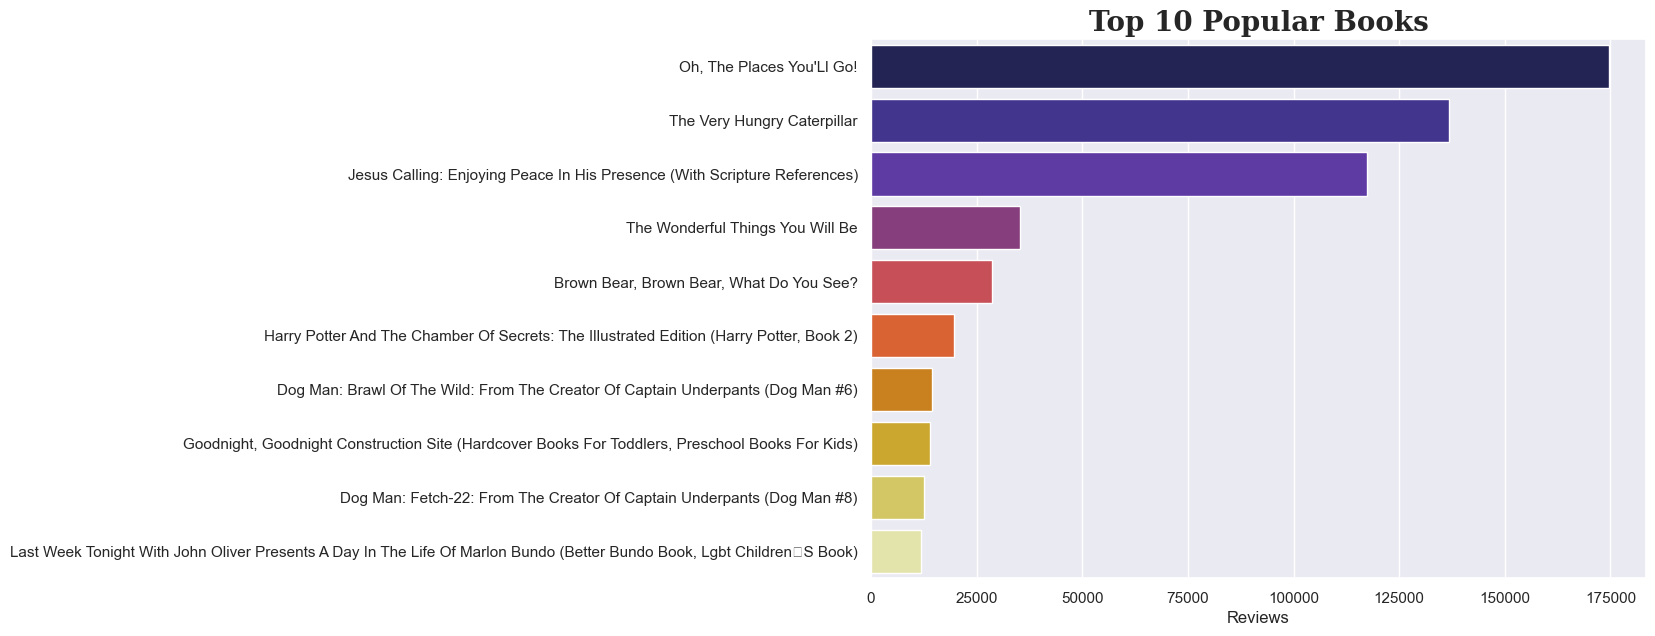

In [31]:
# Visualize most popular books
books = df.groupby('Name').agg({'User Rating':'mean', 'Reviews':'sum', 'Name': 'count'}).rename({'Name': 'Total Books'}, axis = 1)
books = books.sort_values(['User Rating', 'Reviews'], ascending = (False, False)).head(10).reset_index()

sns.set(rc = {'figure.figsize': (10, 7)})
ax = sns.barplot(data=books, x="Reviews", y="Name", palette="CMRmap")
ax.set_title("Top 10 Popular Books", fontfamily='serif', fontsize=20, fontweight='bold')
ax.set(ylabel=None)

<span style="color:#1b259f; font-size:17px; font-weight:bold">5. Data Distribution</span>

<span style="color:#1b259f; font-size:16px; font-weight:bold; padding-left:5px">5.1 User Rating Distribution</span>

[Text(0, 0.5, '')]

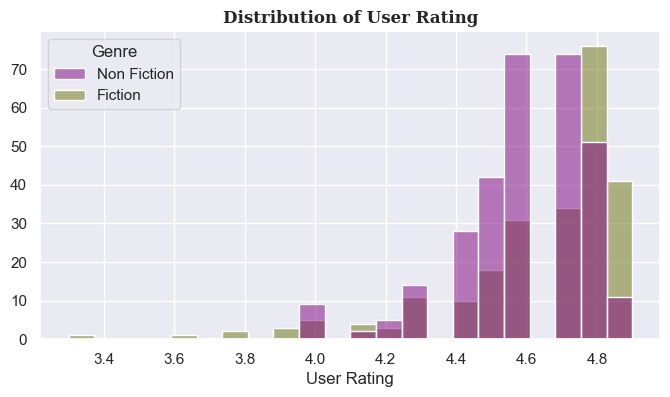

In [32]:
# Rating distribution
color_dict = dict({'Non Fiction':'#800080', 'Fiction':'#6e750e'})
sns.set(rc = {'figure.figsize': (8, 4)})
ax = sns.histplot(data = df, x = 'User Rating', hue = 'Genre', palette = color_dict)
ax.set_title("Distribution of User Rating", fontfamily='serif', fontsize=12, fontweight='bold')
ax.set(ylabel=None)

<span style="font-size:15px;">✔️ INSIGHT: Users give the most ratings on the numbers 4.6, 4.7, and 4.8 and the maximum rating is at 4.8.</span>

<span style="color:#1b259f; font-size:16px; font-weight:bold; padding-left:5px">5.2 Reviews Distribution</span>

[Text(0, 0.5, '')]

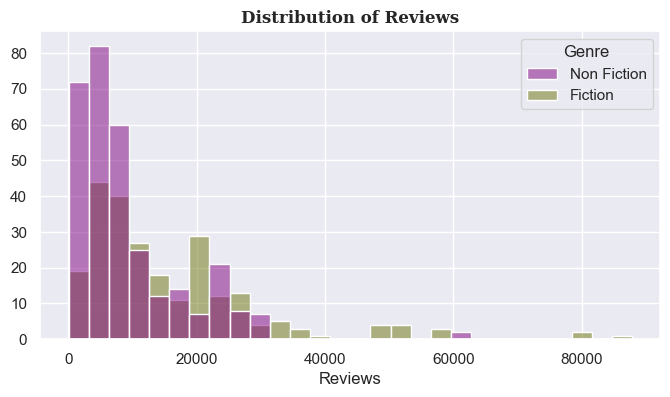

In [33]:
# Reviews distribution
color_dict = dict({'Non Fiction':'#800080', 'Fiction':'#6e750e'})
sns.set(rc = {'figure.figsize': (8, 4)})
ax = sns.histplot(data = df, x = 'Reviews', hue = 'Genre', palette = color_dict)
ax.set_title("Distribution of Reviews", fontfamily='serif', fontsize=12, fontweight='bold')
ax.set(ylabel=None)

<span style="font-size:15px;">✔️ INSIGHT: The average number of reviews is under 20,000 for both genres. There are several reviews with a total of over 40,000 for the Fiction genre.</span>

<span style="color:#1b259f; font-size:16px; font-weight:bold; padding-left:5px">5.3 Price Distribution</span>

[Text(0, 0.5, '')]

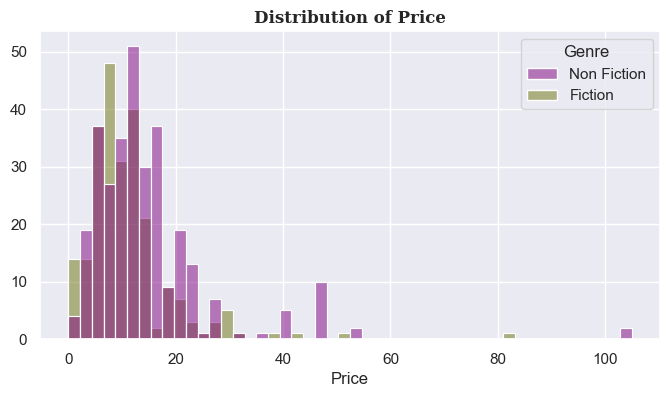

In [34]:
# Price distribution
color_dict = dict({'Non Fiction':'#800080', 'Fiction':'#6e750e'})
sns.set(rc = {'figure.figsize': (8, 4)})
ax = sns.histplot(data = df, x = 'Price', hue = 'Genre', palette = color_dict)
ax.set_title("Distribution of Price", fontfamily='serif', fontsize=12, fontweight='bold')
ax.set(ylabel=None)

<span style="font-size:15px;">✔️ INSIGHT: The price range is mostly under 20. There are only a few that are in the range above 20 and above 40.</span>

<span style="color:#1b259f; font-size:17px; font-weight:bold">6. Yearly Trends</span>

<span style="color:#1b259f; font-size:16px; font-weight:bold; padding-left:5px">6.1 Average Ratings by Year</span>

Text(0.5, 1.0, 'Average Ratings by Year')

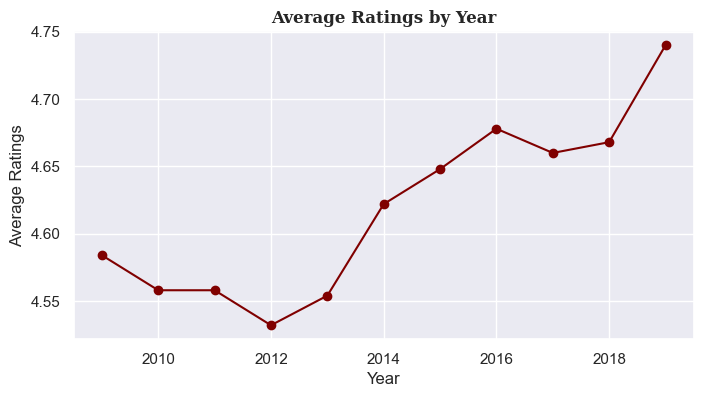

In [35]:
# Average ratings by year
fig, ax = plt.subplots(1, figsize=(8, 4))
df.groupby('Year')['User Rating'].mean().plot(marker = 'o', c = '#800000')
plt.xlabel('Year')
plt.ylabel('Average Ratings')
plt.title("Average Ratings by Year", fontfamily='serif', fontsize=12, fontweight='bold')

<span style="color:#1b259f; font-size:16px; font-weight:bold; padding-left:5px">6.2 Total Reviews by Year</span>

Text(0.5, 1.0, 'Total Reviews by Year')

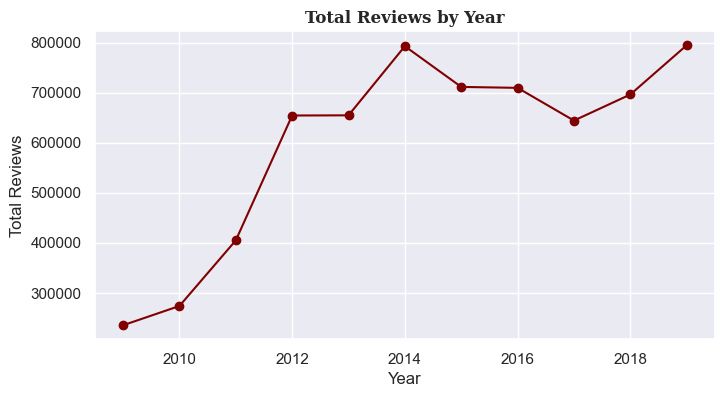

In [36]:
# Total reviews by year
fig, ax = plt.subplots(1, figsize=(8, 4))
df.groupby('Year')['Reviews'].sum().plot(marker = 'o', c = '#800000')
plt.xlabel('Year')
plt.ylabel('Total Reviews')
plt.title("Total Reviews by Year", fontfamily='serif', fontsize=12, fontweight='bold')

<span style="color:#1e267f; font-size:16px; font-weight:bold;">Created by: Felice Benita</span>